In [14]:
#Implement Tarrataca’s quantum production system with the 3-puzzle problem


In [15]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister,transpile
from qiskit.circuit.library import GroverOperator
from qiskit_aer import AerSimulator

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def create_3_puzzle_circuit():
    """Create the quantum circuit for solving the 3-puzzle problem using Grover's algorithm."""
    # Initialize quantum and classical registers
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(qr, cr)

    # Initial state |000>
    # CNOT gates to exchange positions of qubits
    # The CNOT gates represent moves (swapping tile positions).

    # In Tarrataca’s model, production rules (like "move tile left") are encoded as reversible quantum gates.

    # These operations simulate transitions between puzzle states.
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])

    # Apply Hadamard gates to create superposition
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])

    # Placeholder for Grover's algorithm
    # This requires defining an oracle and the Grover operator
    # Here we use a simple placeholder to illustrate the concept
    oracle = QuantumCircuit(3)
    oracle.z(0)  # Example oracle condition (adjust based on the puzzle's rules)
    oracle_gate = oracle.to_gate(label="Oracle")

    # Grover operator-> give the exact position of the goal state
    grover_operator = GroverOperator(oracle)
    qc.append(grover_operator, qr)

    # Measurement
    qc.measure(qr, cr)
    return qc

In [ ]:
# Create the 3-puzzle quantum circuit
qc = create_3_puzzle_circuit()

# Execute the circuit on a quantum simulator
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)

job = simulator.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Output the result
print("Measurement results from the 3-puzzle quantum circuit:")
print(counts)

# Displays the probability distribution of all outcomes.
# The state with the highest count = the correct solution (goal configuration).

Measurement results from the 3-puzzle quantum circuit:
{'011': 127, '010': 138, '100': 146, '101': 136, '110': 130, '000': 124, '001': 124, '111': 99}


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_28956\764005055.py:26: DeprecationWarning: The class ``qiskit.circuit.library.grover_operator.GroverOperator`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use qiskit.circuit.library.grover_operator instead.
  grover_operator = GroverOperator(oracle)


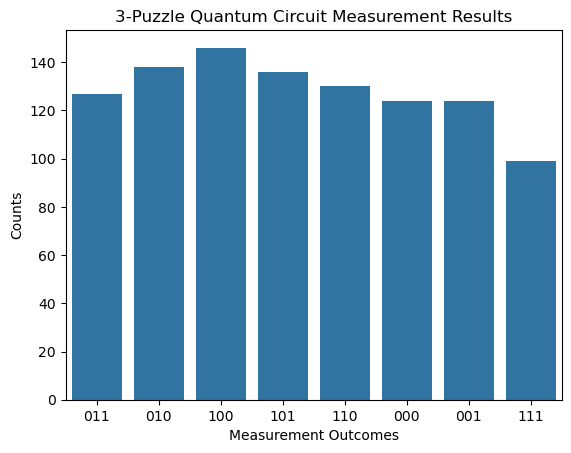

In [19]:
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('3-Puzzle Quantum Circuit Measurement Results')
plt.show()